In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install pillow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
# Import the EEG Data from Subject Listening to Music
url = 'data/tiny_eeg_self_experiment_music.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,IndexId,Channel1,Channel2,Channel3,Channel4,Ref1,Ref2,Ref3,TS1,TS2
0,0,933.19,519.23,21.71,238.45,0,0,0,20:04:02,1.543190e+12
1,1,932.94,516.98,22.70,251.80,0,0,0,20:04:02,1.543190e+12
2,2,827.70,521.87,17.26,207.42,0,0,0,20:04:02,1.543190e+12
3,3,893.26,519.82,18.90,219.49,0,0,0,20:04:02,1.543190e+12
4,4,953.94,520.69,21.88,252.06,0,0,0,20:04:02,1.543190e+12


In [4]:
# Remove IndexId, it's not important
newData = data.drop(columns = ['IndexId'], axis=1)
newData.head()

,Channel1,Channel2,Channel3,Channel4,Ref1,Ref2,Ref3,TS1,TS2
0,933.19,519.23,21.71,238.45,0,0,0,20:04:02,1.543190e+12
1,932.94,516.98,22.70,251.80,0,0,0,20:04:02,1.543190e+12
2,827.70,521.87,17.26,207.42,0,0,0,20:04:02,1.543190e+12
3,893.26,519.82,18.90,219.49,0,0,0,20:04:02,1.543190e+12
4,953.94,520.69,21.88,252.06,0,0,0,20:04:02,1.543190e+12


Text(0.5, 1.0, 'Spike Detection While Listening to Music')

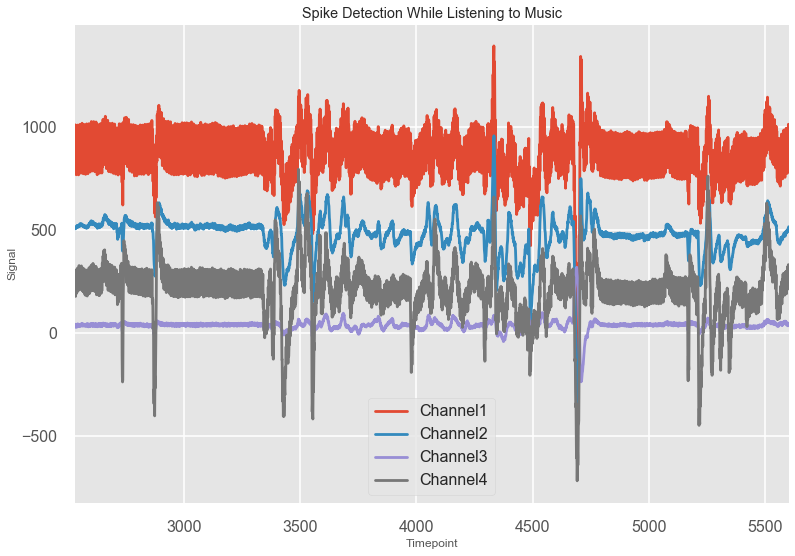

In [5]:
# At a glance, we have four channels, three separate references, and two timestamps, a human readable one and one that is ... not so much. 

# We can break up each channel and view their change as a function of time using the more readable timestamp as the label but TS2 as the Y value. Let's use Seaborn for our Timeseries data: https://seaborn.pydata.org/examples/errorband_lineplots.html

sns.set(rc={'figure.figsize':(11, 8)})
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')
channels_plot = ['Channel1', 'Channel2', 'Channel3', 'Channel4']
ax = newData.loc[2530:5600, channels_plot].plot()
ax.set_ylabel('Signal')
ax.set_xlabel('Timepoint')
ax.set_title('Spike Detection While Listening to Music')
